In [1]:
!pip install geopandas pandas requests



In [2]:
import requests
import geopandas as gpd
import pandas as pd
from io import BytesIO

# 🌍 EMSC GeoJSON URL (official)
url = "https://www.emsc-csem.org/javascript/gem_active_faults.geojson"

# 🛰️ Download the GeoJSON data
response = requests.get(url)
response.raise_for_status()  # Raise an error if download fails

# 🧭 Load into a GeoDataFrame
gdf = gpd.read_file(BytesIO(response.content))

# 🧾 Display info
print("✅ GeoJSON file loaded successfully!")
print("Number of fault lines:", len(gdf))
print("Columns:", list(gdf.columns))
print("\nSample data:")
print(gdf.head())

# 💾 Save both formats
gdf.to_file("active_faults.geojson", driver="GeoJSON")
gdf.drop(columns='geometry').to_csv("active_faults_attributes.csv", index=False, encoding='utf-8-sig')

print("\n Files saved:")
print("- active_faults.geojson (for GIS apps / mapping)")
print("- active_faults_attributes.csv (for tabular data analysis)")


✅ GeoJSON file loaded successfully!
Number of fault lines: 16195
Columns: ['accuracy', 'activity_confidence', 'average_dip', 'average_rake', 'catalog_id', 'catalog_name', 'dip_dir', 'downthrown_side_dir', 'downthrown_side_id', 'epistemic_quality', 'exposure_quality', 'fs_name', 'last_movement', 'lower_seis_depth', 'name', 'net_slip_rate', 'notes', 'reference', 'shortening_rate', 'slip_type', 'strike_slip_rate', 'upper_seis_depth', 'vert_sep_rate', 'geometry']

Sample data:
  accuracy activity_confidence average_dip average_rake catalog_id  \
0     None                None      (38,,)     (90.0,,)      UCF_2   
1     None                None      (90,,)    (180.0,,)      UCF_9   
2     None                None      (90,,)    (150.0,,)     UCF_11   
3     None                None      (90,,)    (180.0,,)     UCF_13   
4     None                None      (45,,)     (90.0,,)     UCF_15   

  catalog_name dip_dir downthrown_side_dir downthrown_side_id  \
0       UCERF3       E              

### Importing data and loading it

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
df = pd.read_csv("active_faults_attributes.csv")

# Basic info
print("Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())

# Peek at data
df.head()


Shape: (16195, 23)

Column Names:
 ['accuracy', 'activity_confidence', 'average_dip', 'average_rake', 'catalog_id', 'catalog_name', 'dip_dir', 'downthrown_side_dir', 'downthrown_side_id', 'epistemic_quality', 'exposure_quality', 'fs_name', 'last_movement', 'lower_seis_depth', 'name', 'net_slip_rate', 'notes', 'reference', 'shortening_rate', 'slip_type', 'strike_slip_rate', 'upper_seis_depth', 'vert_sep_rate']


,accuracy,activity_confidence,average_dip,average_rake,catalog_id,catalog_name,dip_dir,downthrown_side_dir,downthrown_side_id,epistemic_quality,...,lower_seis_depth,name,net_slip_rate,notes,reference,shortening_rate,slip_type,strike_slip_rate,upper_seis_depth,vert_sep_rate
0,NaN,NaN,"(38,,)","(90.0,,)",UCF_2,UCERF3,E,NaN,NaN,NaN,...,"(16.0,,)",Mount Diablo Thrust,"(1.55,0.8,2.22)",NaN,NaN,NaN,Reverse,NaN,"(8.0,,)",NaN
1,NaN,NaN,"(90,,)","(180.0,,)",UCF_9,UCERF3,NaN,NaN,NaN,NaN,...,"(11.0,,)",Ortigalita (South),"(1.23,0.35,2.75)",NaN,NaN,NaN,Dextral,NaN,"(0.0,,)",NaN
2,NaN,NaN,"(90,,)","(150.0,,)",UCF_11,UCERF3,NaN,NaN,NaN,NaN,...,"(14.0,,)",Monterey Bay-Tularcitos,"(0.57,0.23,1.73)",NaN,NaN,NaN,Dextral,NaN,"(0.0,,)",NaN
3,NaN,NaN,"(90,,)","(180.0,,)",UCF_13,UCERF3,NaN,NaN,NaN,NaN,...,"(10.0,,)",Mendocino,"(8.95,4.44,12.97)",NaN,NaN,NaN,Dextral,NaN,"(0.0,,)",NaN
4,NaN,NaN,"(45,,)","(90.0,,)",UCF_15,UCERF3,NE,NaN,NaN,NaN,...,"(13.0,,)",Table Bluff,"(0.82,0.51,1.42)",NaN,NaN,NaN,Reverse,NaN,"(0.0,,)",NaN


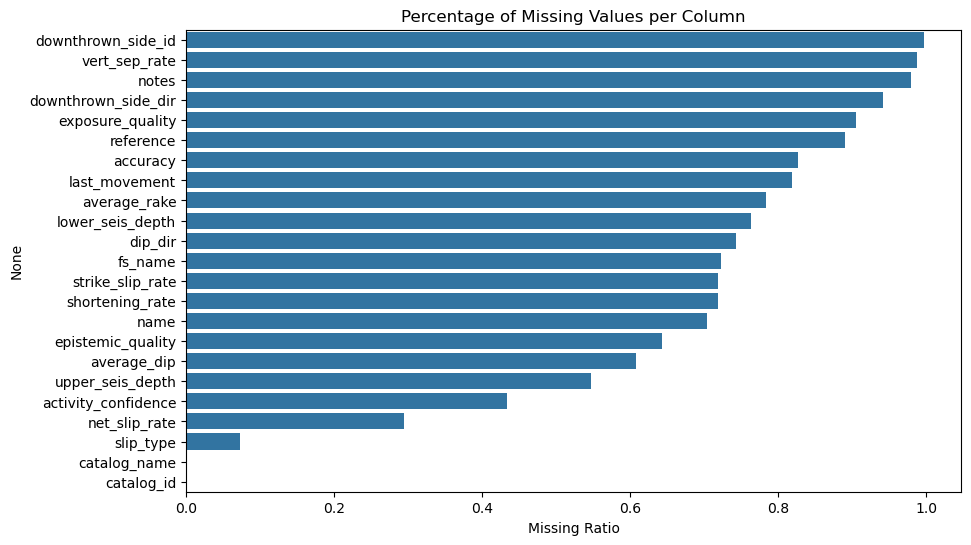

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

missing = df.isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=missing, y=missing.index)
plt.title("Percentage of Missing Values per Column")
plt.xlabel("Missing Ratio")
plt.show()


In [5]:
#Helps to identify columns worth keeping
missing_summary = df.isnull().sum().sort_values(ascending=False)
missing_summary / len(df) * 100  # % missing


downthrown_side_id     99.703612
vert_sep_rate          98.795925
notes                  97.974684
downthrown_side_dir    94.146341
exposure_quality       90.552640
reference              89.027478
accuracy               82.667490
last_movement          81.877123
average_rake           78.357518
lower_seis_depth       76.319852
dip_dir                74.331584
fs_name                72.244520
strike_slip_rate       71.880210
shortening_rate        71.818462
name                   70.385922
epistemic_quality      64.328496
average_dip            60.753319
upper_seis_depth       54.646496
activity_confidence    43.346712
net_slip_rate          29.379438
slip_type               7.304724
catalog_name            0.000000
catalog_id              0.000000
dtype: float64

In [6]:
# Drop columns with >80% missing data
df_reduced = df.dropna(axis=1, thresh=len(df)*0.2)
print("Remaining columns:", df_reduced.shape[1])


Remaining columns: 15


In [7]:
# Fill numeric columns with median
num_cols = df_reduced.select_dtypes(include=['float64', 'int64']).columns
df_reduced[num_cols] = df_reduced[num_cols].fillna(df_reduced[num_cols].median())

# Fill categorical columns with mode
cat_cols = df_reduced.select_dtypes(include=['object']).columns
df_reduced[cat_cols] = df_reduced[cat_cols].fillna(df_reduced[cat_cols].mode().iloc[0])


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27012\779095845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[num_cols] = df_reduced[num_cols].fillna(df_reduced[num_cols].median())
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27012\779095845.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[cat_cols] = df_reduced[cat_cols].fillna(df_reduced[cat_cols].mode().iloc[0])


### Performing PCA(Truncated SVD)


Numeric columns: 2 | Categorical columns: 13
⏳ Running fast SVD decomposition...
Original shape: (16195, 15)
Reduced shape (SVD output): (16195, 20)


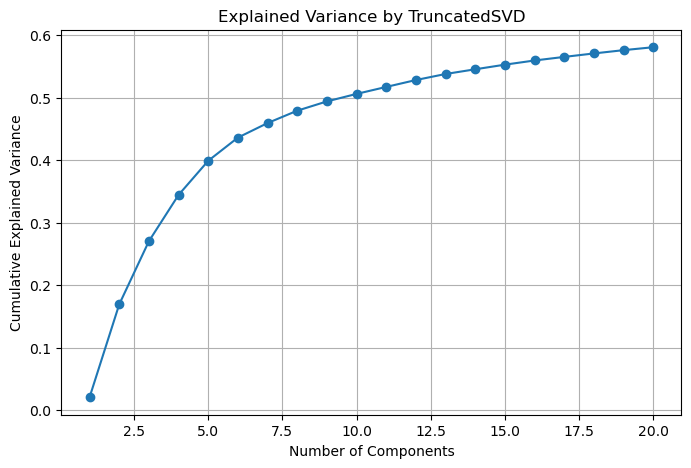

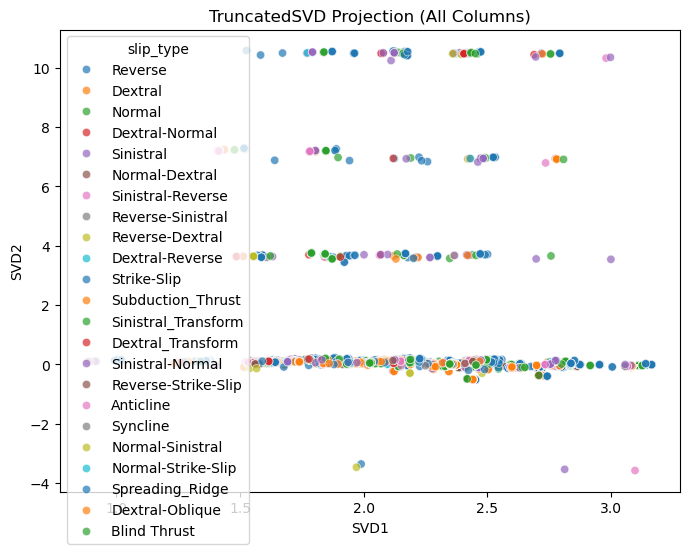

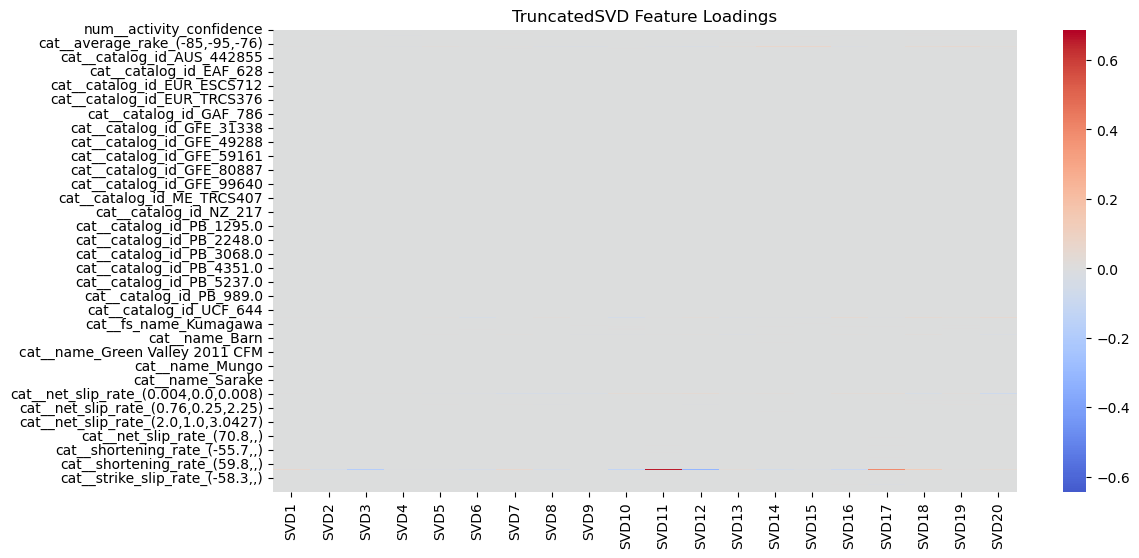

In [14]:

# FAST PCA on Mixed (Numeric + Categorical) Data

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns

# ---Prepare data ---
df_all = df_reduced.copy()

# Separate numeric and categorical columns
num_cols = df_all.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df_all.select_dtypes(include=['object']).columns

print(f"Numeric columns: {len(num_cols)} | Categorical columns: {len(cat_cols)}")

# --- Preprocessing ---
# Standardize numeric columns, one-hot encode categoricals (sparse)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), cat_cols)
    ],
    remainder='drop'
)

# --- Dimensionality Reduction using TruncatedSVD ---
svd = TruncatedSVD(n_components=20, random_state=42)

# Build pipeline
svd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svd', svd)
])

# --- Fit and Transform ---
svd_data = svd_pipeline.fit_transform(df_all)


print(f"Original shape: {df_all.shape}")
print(f"Reduced shape (SVD output): {svd_data.shape}")

# --- Explained Variance ---
plt.figure(figsize=(8,5))
plt.plot(range(1, 21), svd.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by TruncatedSVD")
plt.grid(True)
plt.show()

# --- 2D Visualization (first two components) ---
svd_df = pd.DataFrame(svd_data, columns=[f'SVD{i+1}' for i in range(svd_data.shape[1])])
svd_df = pd.concat([svd_df, df_all.reset_index(drop=True)], axis=1)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=svd_df,
    x='SVD1', y='SVD2',
    hue='slip_type' if 'slip_type' in svd_df.columns else None,
    palette='tab10', alpha=0.7
)
plt.title("TruncatedSVD Projection (All Columns)")
plt.show()

# ---  Feature Contributions (optional) ---
loadings = pd.DataFrame(
    svd.components_.T,
    columns=[f'SVD{i+1}' for i in range(svd.n_components)],
    index=svd_pipeline.named_steps['preprocessor'].get_feature_names_out()
)

plt.figure(figsize=(12,6))
sns.heatmap(loadings, cmap='coolwarm', center=0)
plt.title("TruncatedSVD Feature Loadings")
plt.show()


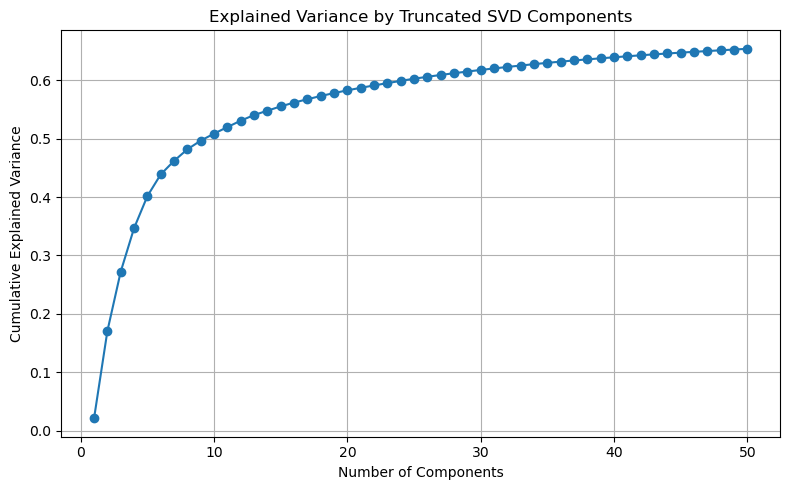

### Performing EDA on the dataset now

In [15]:
# 1. Shape and info
print("Shape:", df_reduced.shape)
print("\nData Info:")
df_reduced.info()

# 2. Check first few rows
df_reduced.head()

# 3. Summary statistics
df_reduced.describe(include='all').T

# 4. Missing values
missing = df_reduced.isnull().sum().sort_values(ascending=False)
print("\nMissing Values:\n", missing)


Shape: (16195, 15)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16195 entries, 0 to 16194
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   activity_confidence  16195 non-null  float64
 1   average_dip          16195 non-null  object 
 2   average_rake         16195 non-null  object 
 3   catalog_id           16195 non-null  object 
 4   catalog_name         16195 non-null  object 
 5   dip_dir              16195 non-null  object 
 6   epistemic_quality    16195 non-null  float64
 7   fs_name              16195 non-null  object 
 8   lower_seis_depth     16195 non-null  object 
 9   name                 16195 non-null  object 
 10  net_slip_rate        16195 non-null  object 
 11  shortening_rate      16195 non-null  object 
 12  slip_type            16195 non-null  object 
 13  strike_slip_rate     16195 non-null  object 
 14  upper_seis_depth     16195 non-null  object 
dtypes: fl

In [16]:
# 1. Remove duplicates
print("Before removing duplicates:", df_reduced.shape)
df_reduced = df_reduced.drop_duplicates()
print("After removing duplicates:", df_reduced.shape)

# 2. Check for NaNs
print("\nNull value summary:")
print(df_reduced.isnull().sum())

# 3. Check unique values in each column
df_reduced.nunique()


Before removing duplicates: (16195, 15)
After removing duplicates: (15998, 15)

Null value summary:
activity_confidence    0
average_dip            0
average_rake           0
catalog_id             0
catalog_name           0
dip_dir                0
epistemic_quality      0
fs_name                0
lower_seis_depth       0
name                   0
net_slip_rate          0
shortening_rate        0
slip_type              0
strike_slip_rate       0
upper_seis_depth       0
dtype: int64


activity_confidence        2
average_dip              510
average_rake             642
catalog_id             15866
catalog_name              20
dip_dir                   27
epistemic_quality          4
fs_name                  831
lower_seis_depth         164
name                    3500
net_slip_rate           2793
shortening_rate         1682
slip_type                 23
strike_slip_rate        1260
upper_seis_depth          41
dtype: int64

### Univariate Analysis

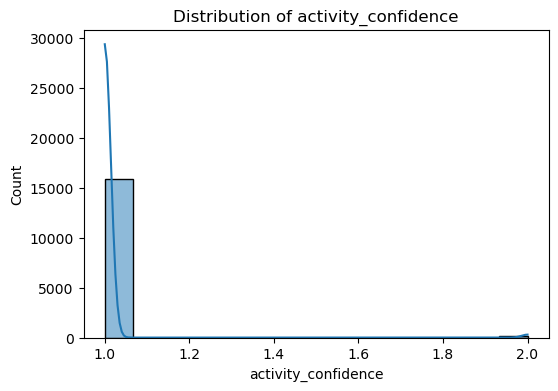

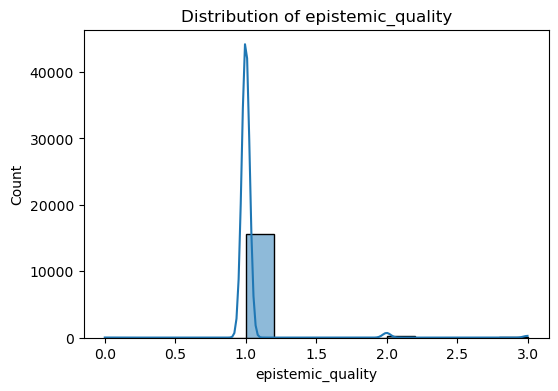

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#Univariate analysis for numerical columns
num_cols = df_reduced.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_reduced[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


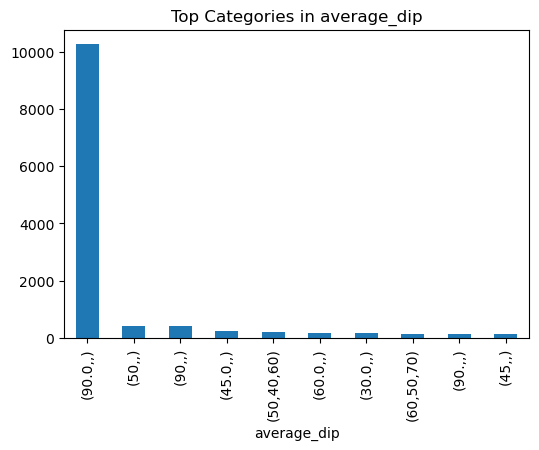

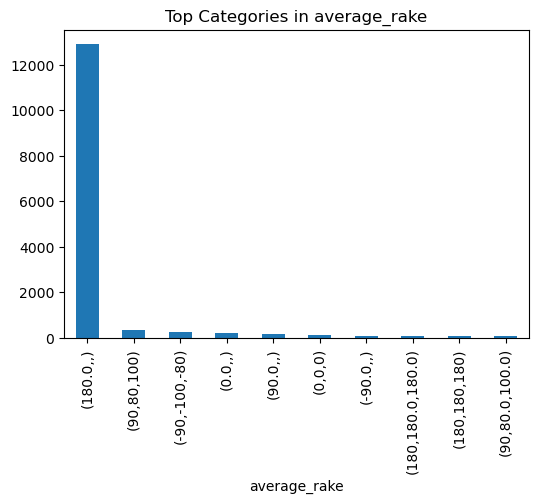

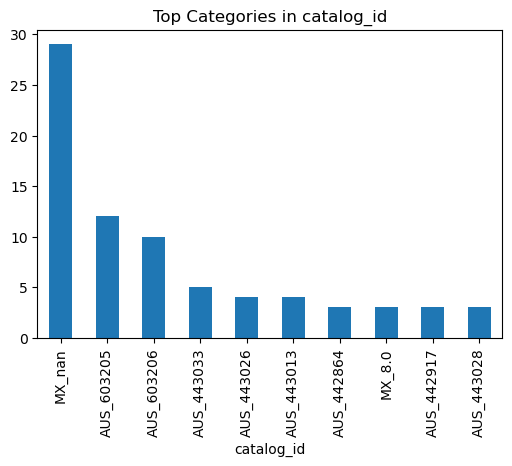

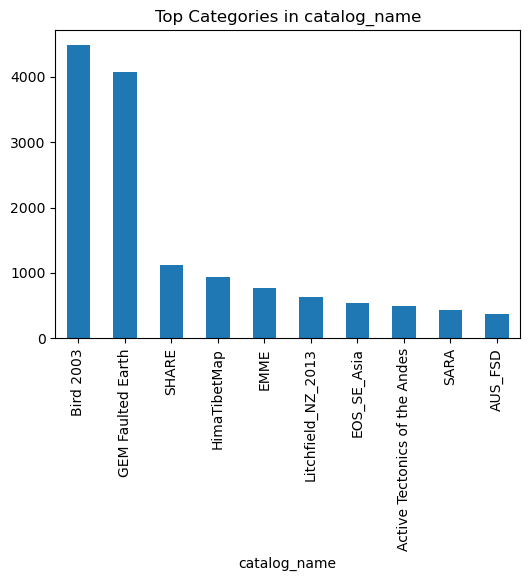

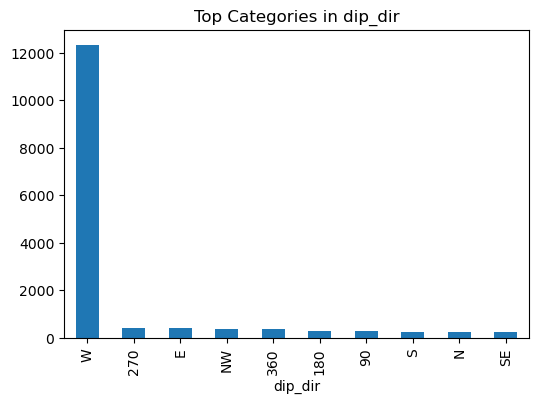

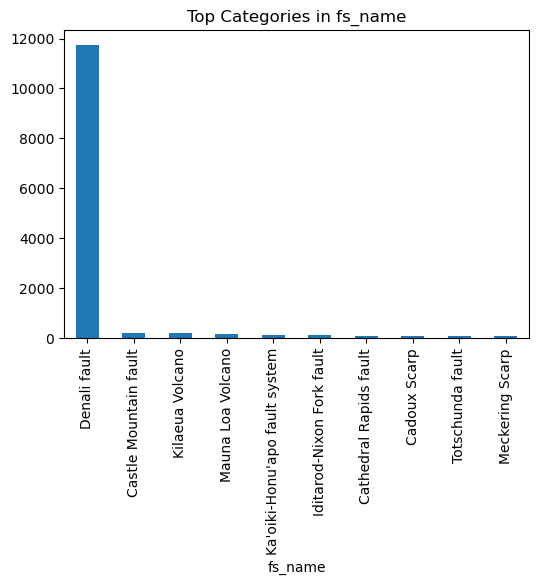

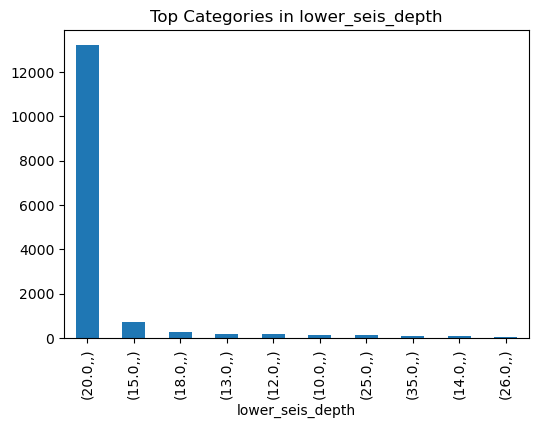

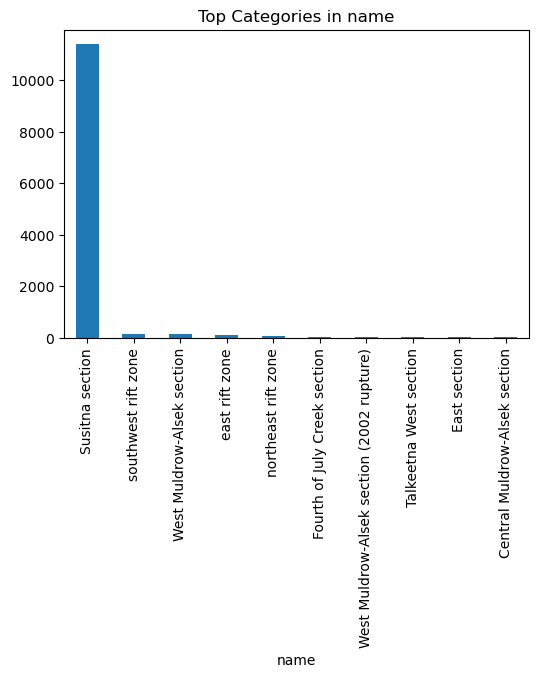

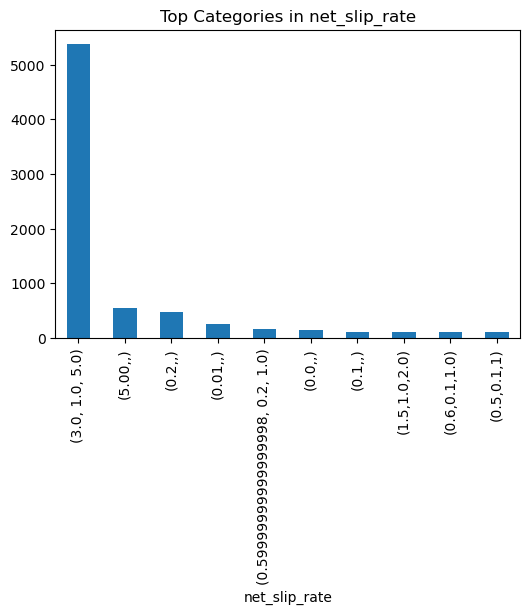

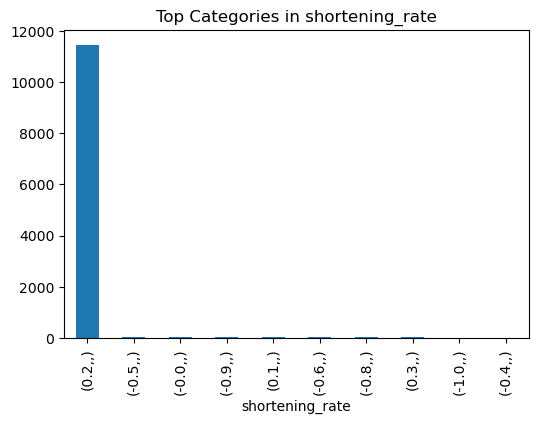

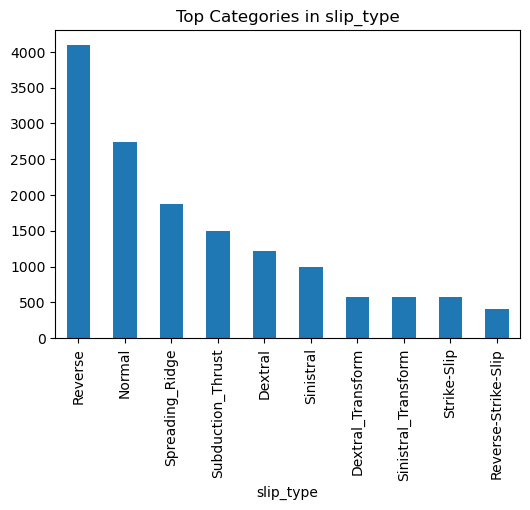

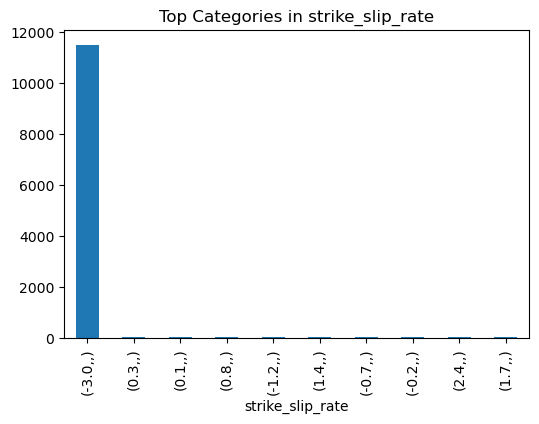

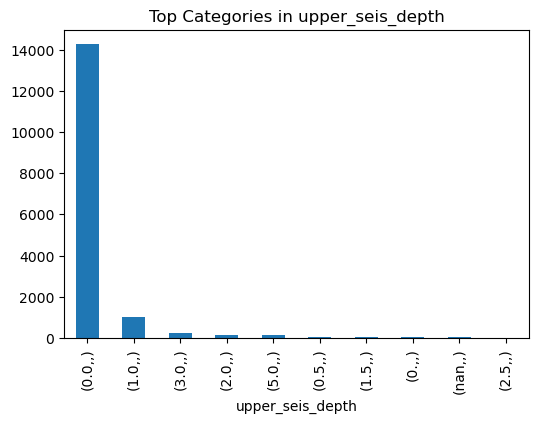

In [18]:
cat_cols = df_reduced.select_dtypes(include=['object']).columns
#Univariate analysis for categorical columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    df_reduced[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top Categories in {col}")
    plt.show()


### Bivariate Analysis

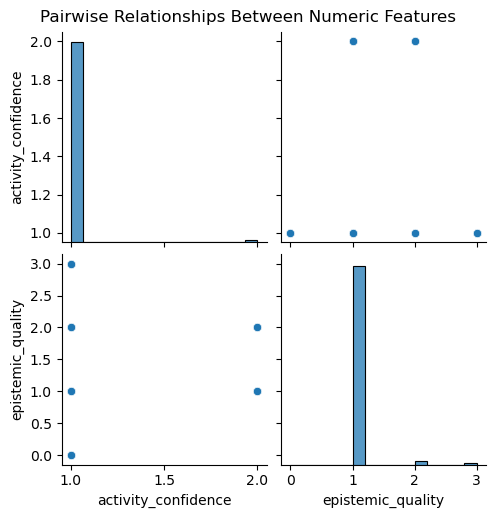

In [19]:
#Numeric vs Numeric
sns.pairplot(df_reduced[num_cols])
plt.suptitle("Pairwise Relationships Between Numeric Features", y=1.02)
plt.show()


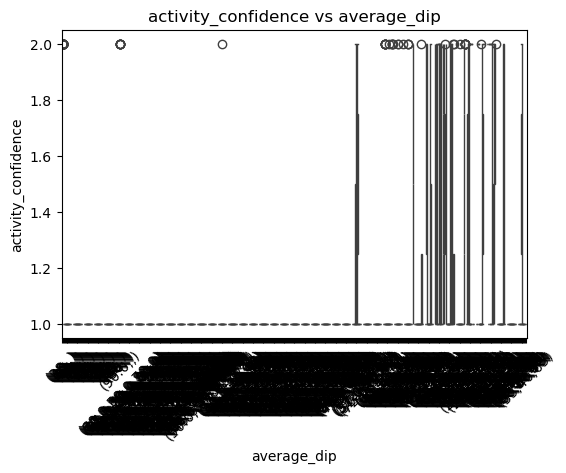

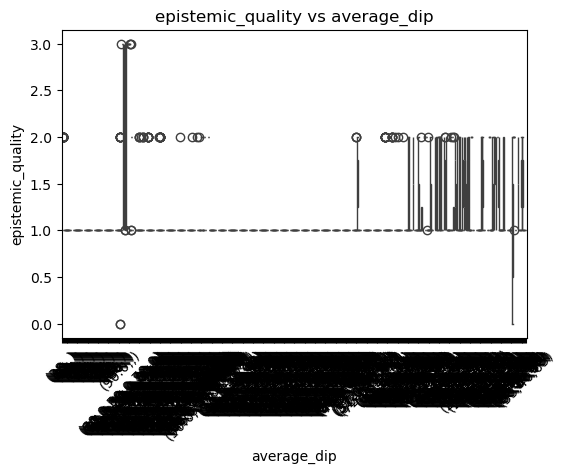

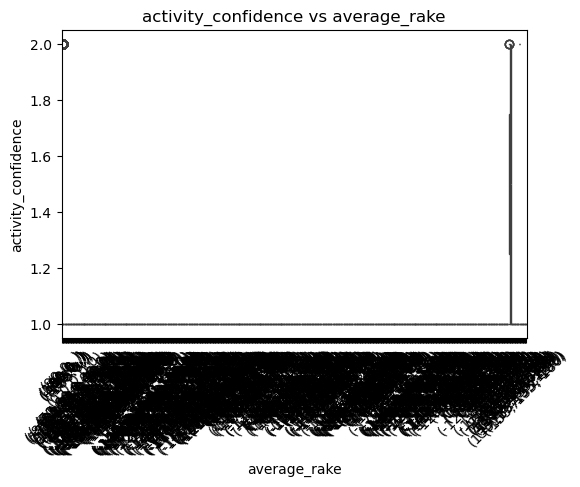

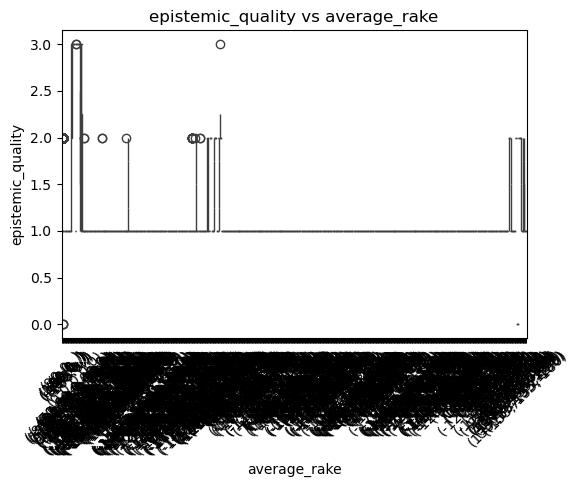

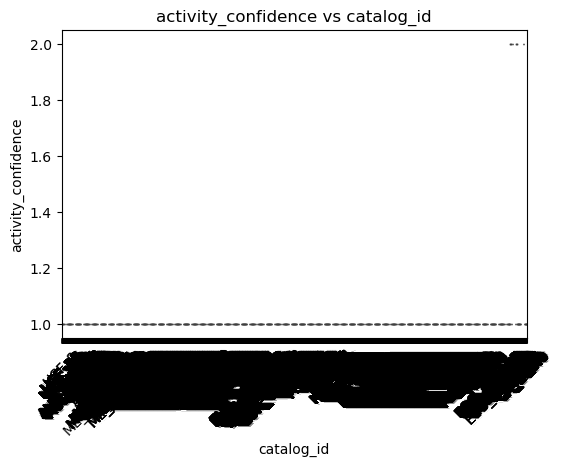

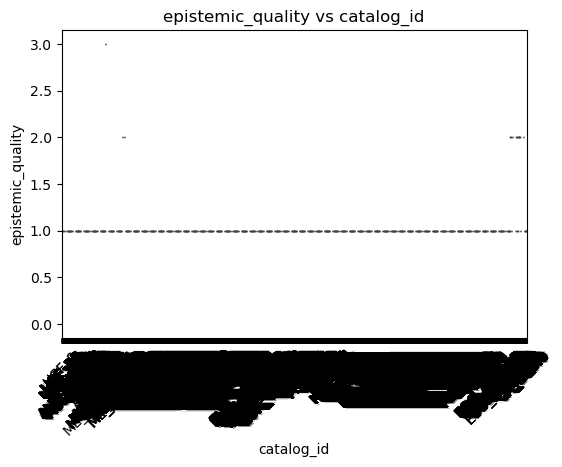

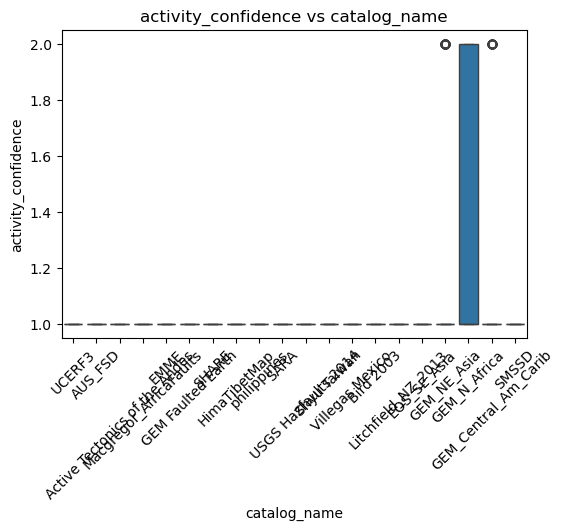

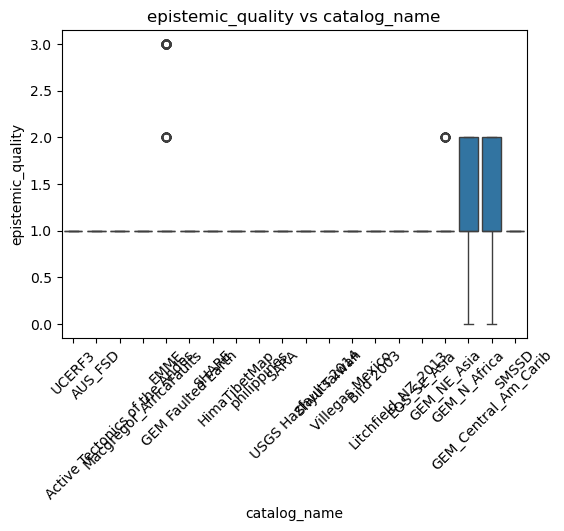

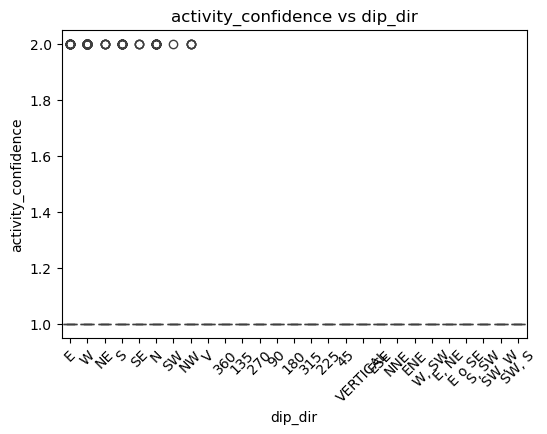

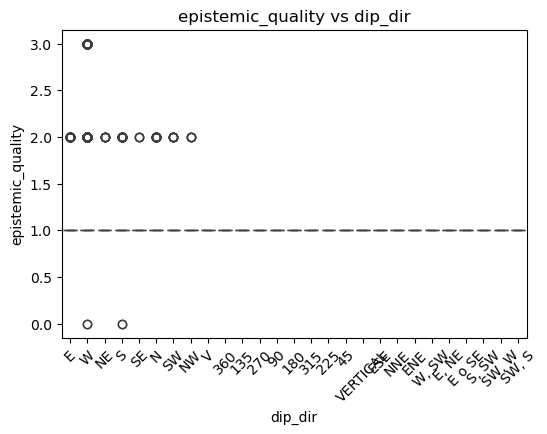

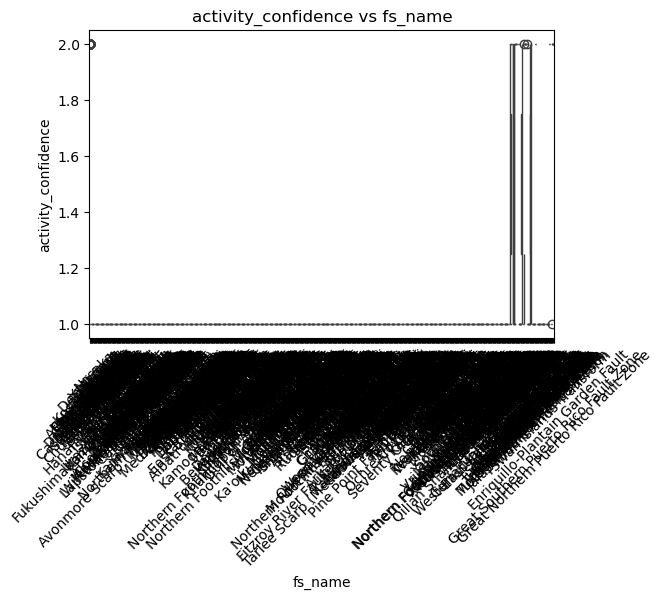

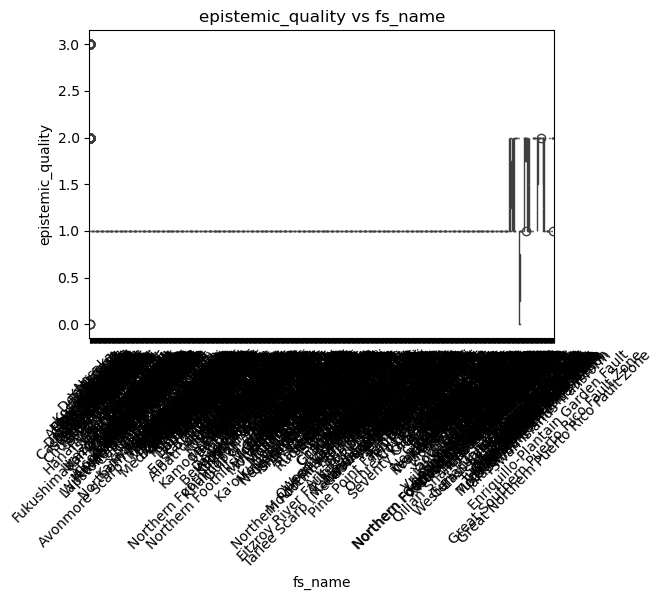

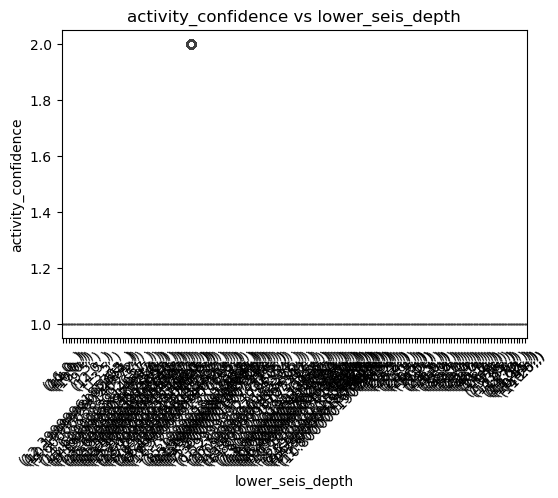

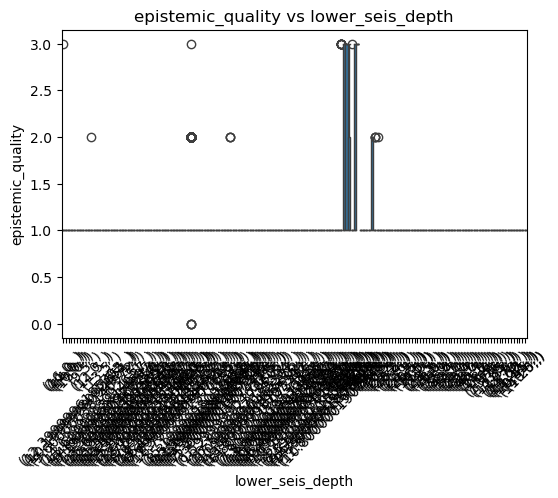

C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 135 (\x87) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 151 (\x97) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


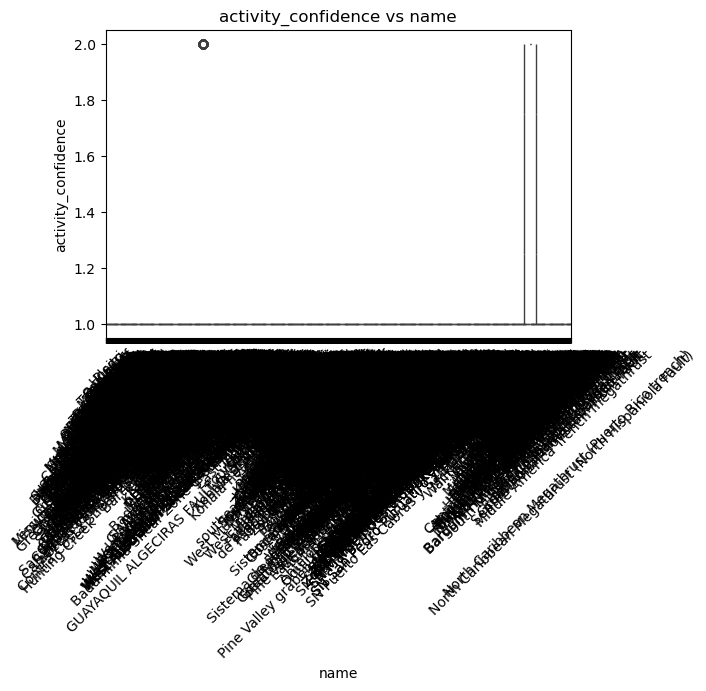

C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 135 (\x87) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 151 (\x97) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


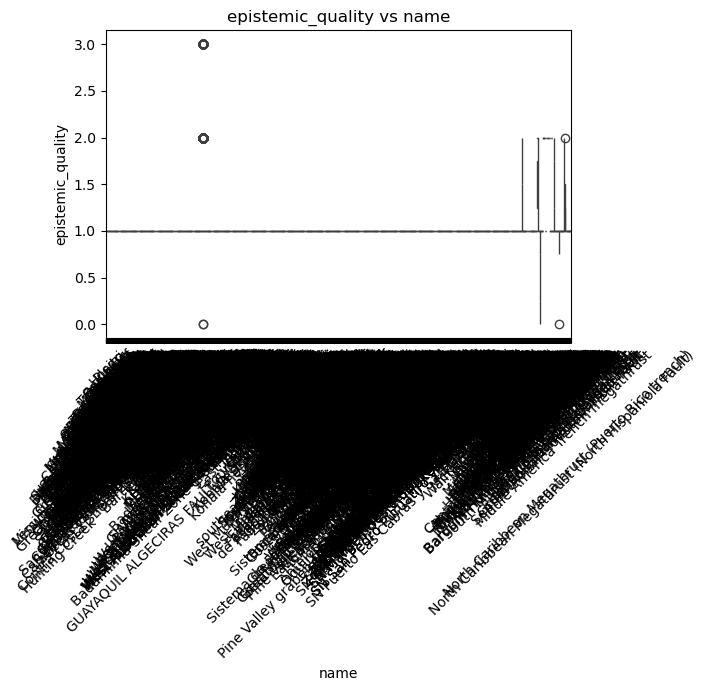

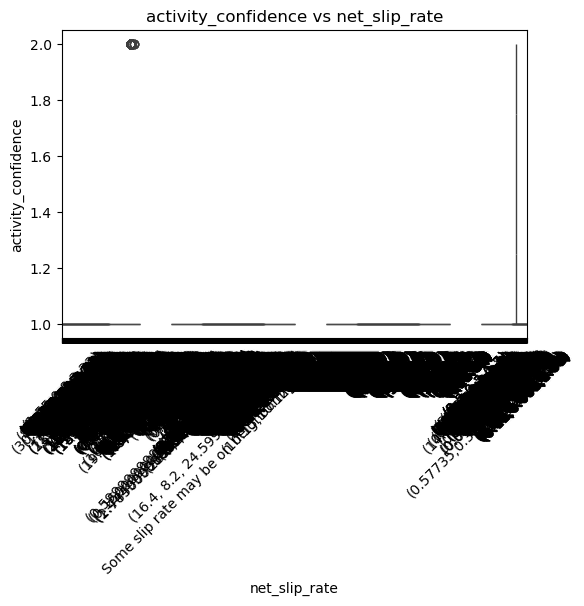

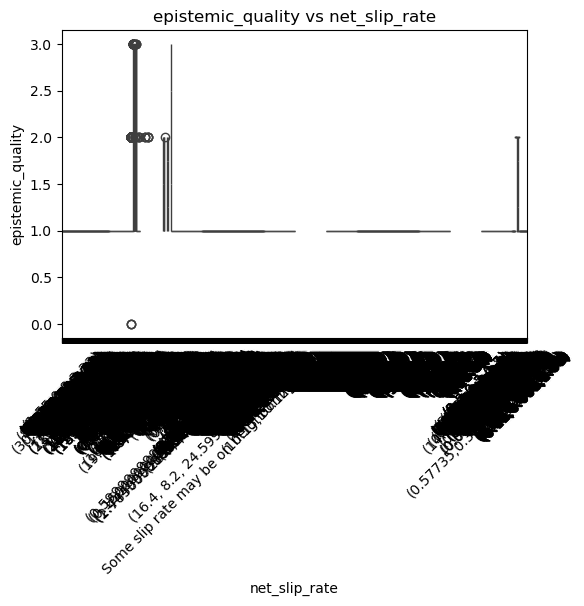

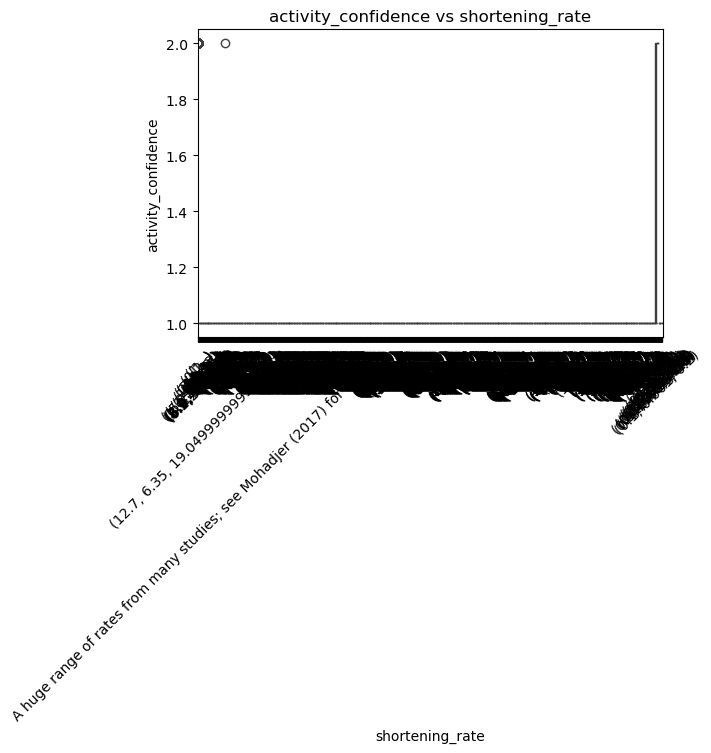

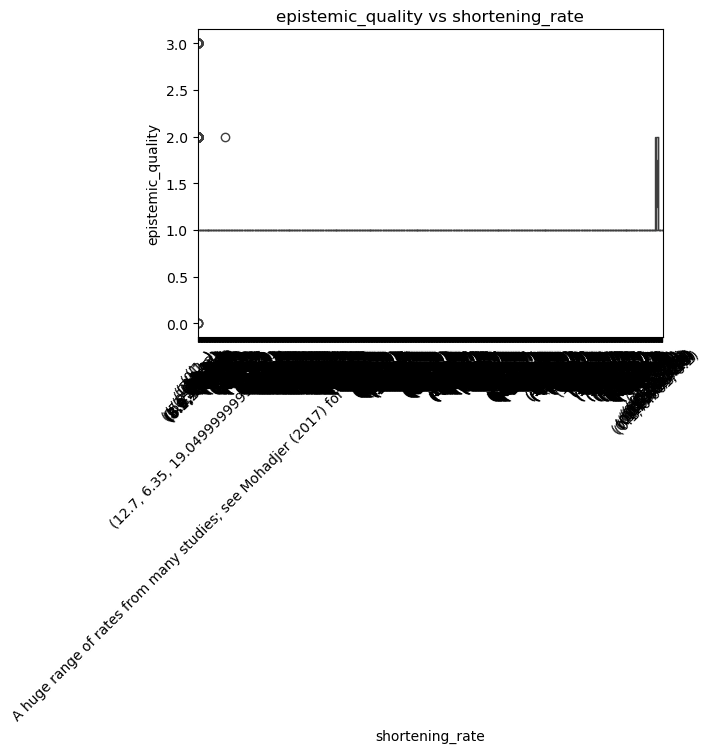

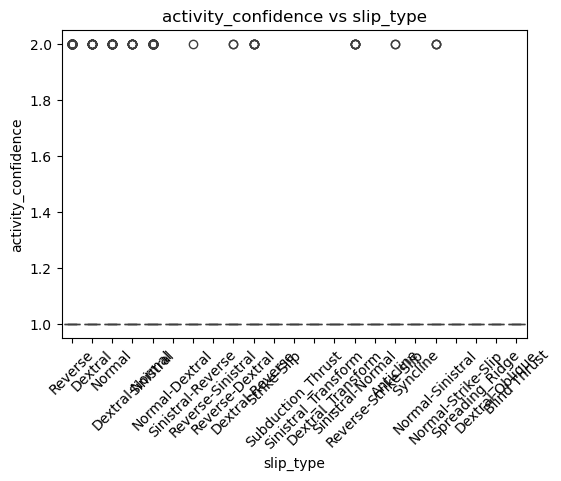

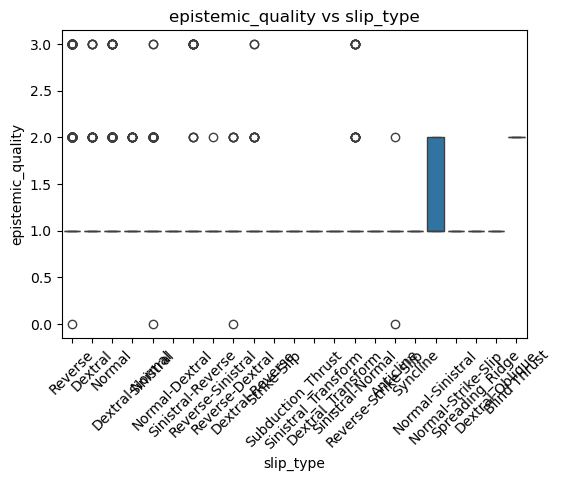

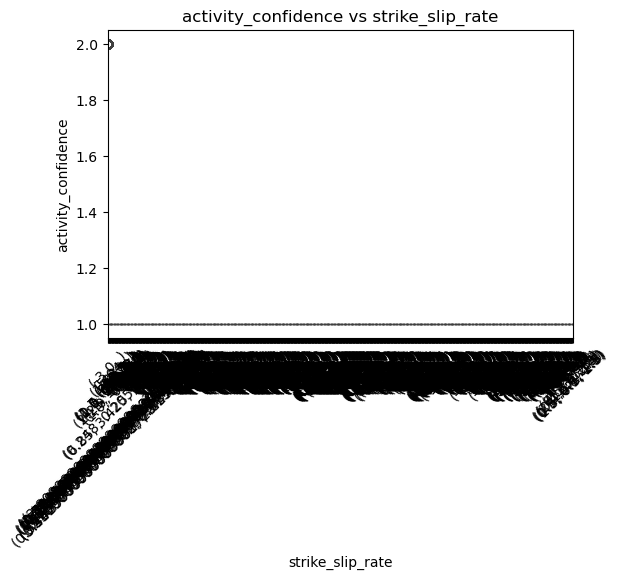

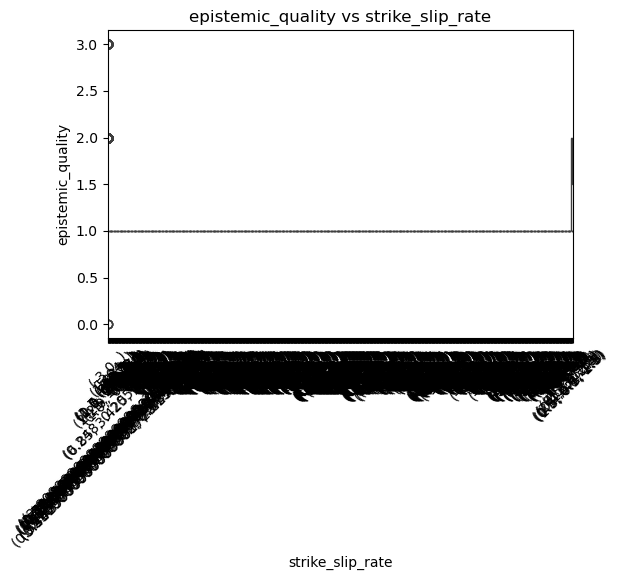

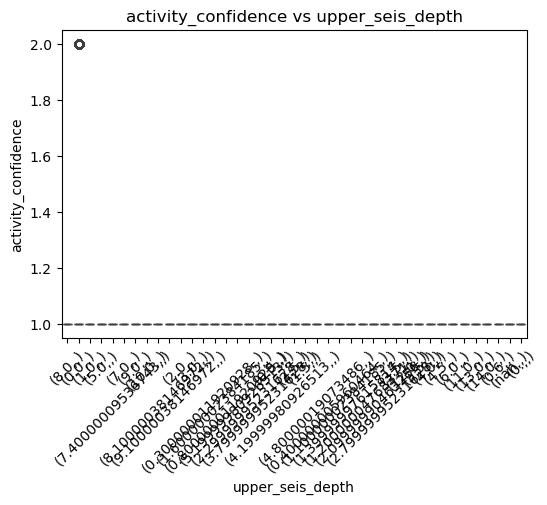

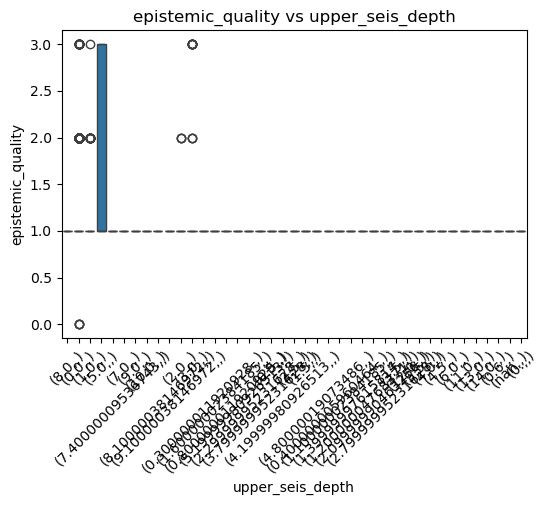

In [20]:
#Numeric Vs Categorical
for cat in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=cat, y=num, data=df_reduced)
        plt.title(f"{num} vs {cat}")
        plt.xticks(rotation=45)
        plt.show()


### Correlation Analysis

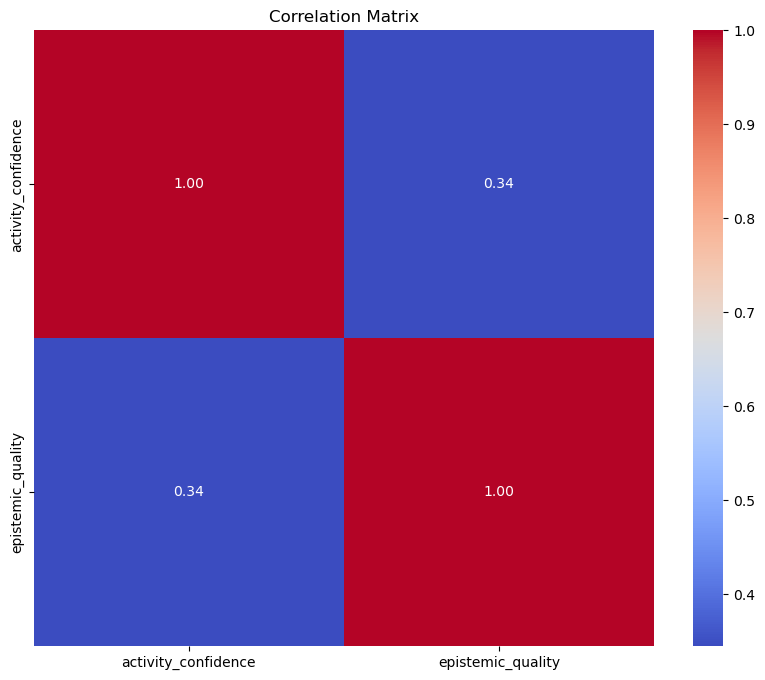

Series([], dtype: float64)

In [22]:
corr = df_reduced[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Highly correlated pairs
corr_pairs = corr.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[(corr_pairs != 1) & (abs(corr_pairs) > 0.7)]
corr_pairs.head()


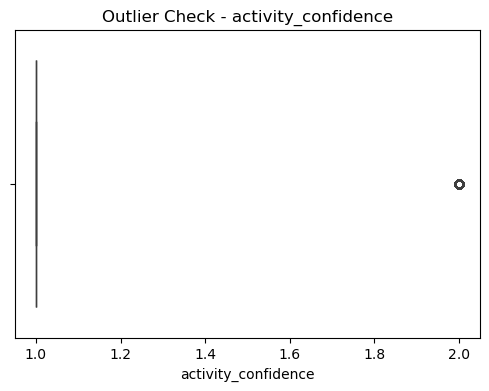

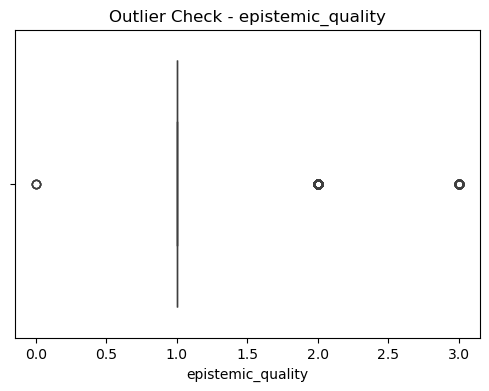

In [23]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_reduced[col])
    plt.title(f"Outlier Check - {col}")
    plt.show()
